Data preprocessing


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import scipy.stats as scp;
from sklearn.feature_selection import RFE;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import LabelEncoder;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import ExtraTreesRegressor;
from sklearn.metrics import r2_score,accuracy_score;
import statsmodels.api as apl;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import cross_val_score,KFold;
from sklearn.model_selection import StratifiedKFold;
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score;
from imblearn.over_sampling import SMOTE ;
from imblearn.under_sampling import NearMiss;
import collections;
from sklearn.linear_model import Ridge;
from numpy import absolute;
from sklearn.model_selection import GridSearchCV;
from numpy import arange;
from sklearn.preprocessing import PowerTransformer;
from sklearn.linear_model import Lasso;
from sklearn.linear_model import ElasticNet;



In [3]:
df = pd.read_csv("hotel.csv");
print(df.info())
print(df.shape)


feature_having_na = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print('feature having na:- ', feature_having_na);
numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O' ]
print('numerical features are ', numerical_feature, 'count of numerical featuers are ', len(numerical_feature))
categorical_feature = list(set(df.columns)-set(numerical_feature))
print('categorical_feature are ', categorical_feature, 'count of categorical_feature are ', len(categorical_feature))

descrete_features = [feature for feature in numerical_feature if len(df[feature].unique())<25]
print('descrete features are ', descrete_features, 'count of descrete_features are ', len(descrete_features))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21950 entries, 0 to 21949
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21950 non-null  object 
 1   is_canceled                     21950 non-null  int64  
 2   lead_time                       21950 non-null  int64  
 3   arrival_date_year               21950 non-null  int64  
 4   arrival_date_month              21950 non-null  object 
 5   arrival_date_week_number        21950 non-null  int64  
 6   arrival_date_day_of_month       21950 non-null  int64  
 7   stays_in_weekend_nights         21950 non-null  int64  
 8   stays_in_week_nights            21950 non-null  int64  
 9   adults                          21950 non-null  int64  
 10  children                        21950 non-null  int64  
 11  babies                          21950 non-null  int64  
 12  meal                            

In [4]:
print(df.isnull().sum())


df['children'] = df['children'].fillna(df['children'].median());
df['country'] = df['country'].fillna(df['country'].mode().iloc[0]);
df['agent'] = df['agent'].fillna(df['agent'].mean());
df['company'] = df['company'].fillna(df['company'].median());
print(df.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             455
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4639
company                           20108


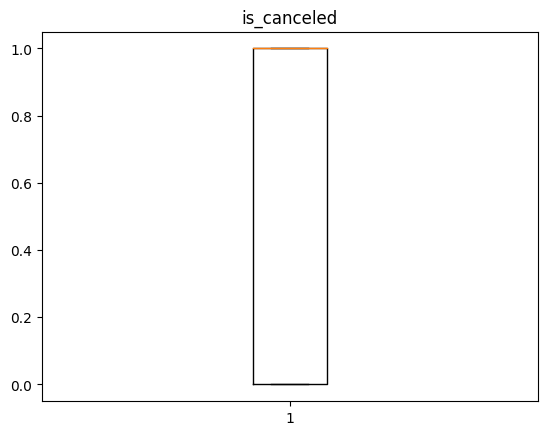

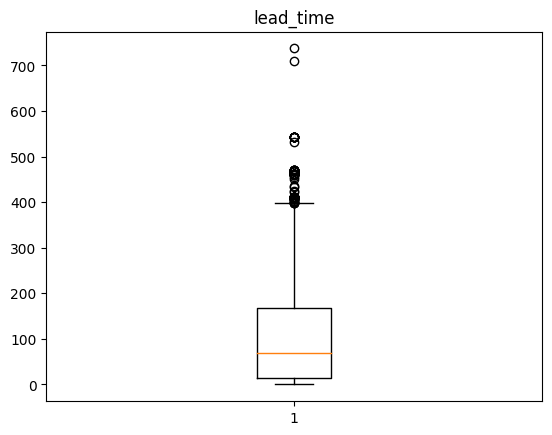

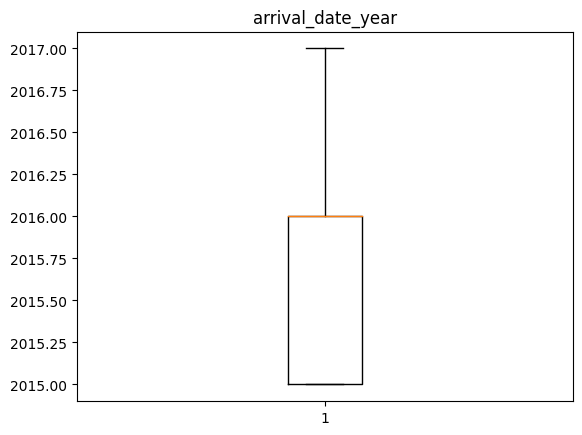

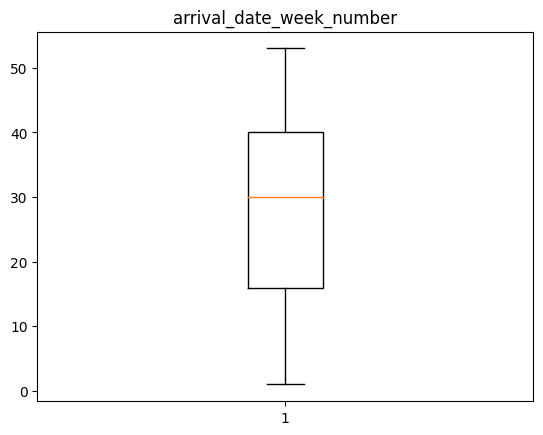

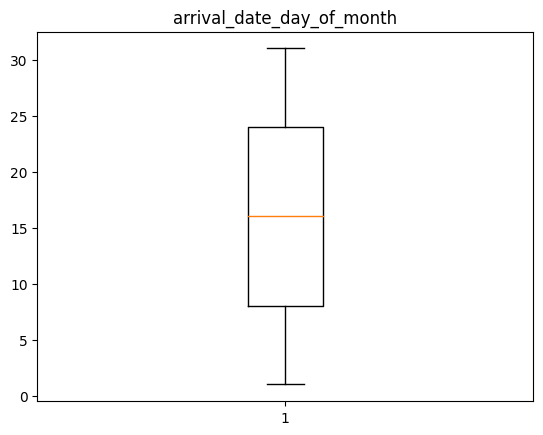

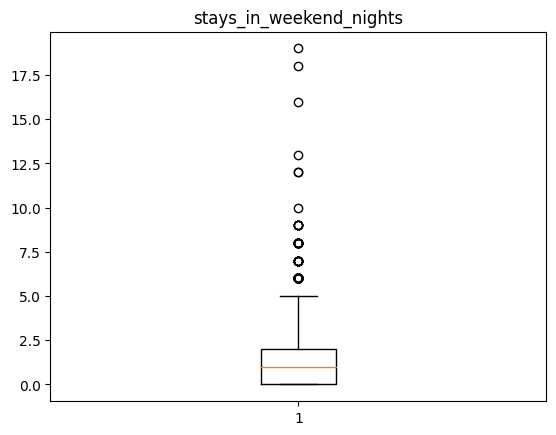

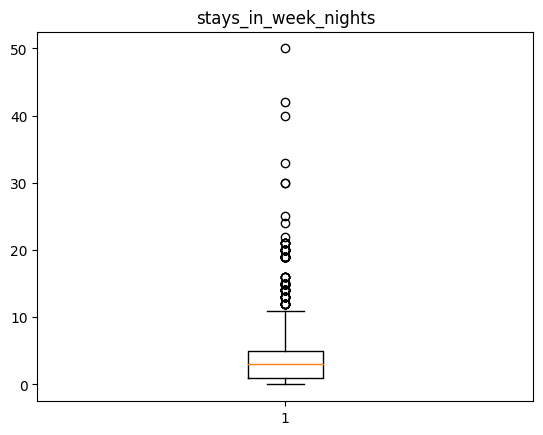

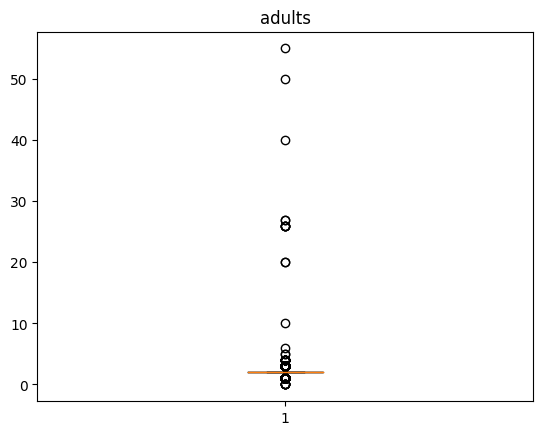

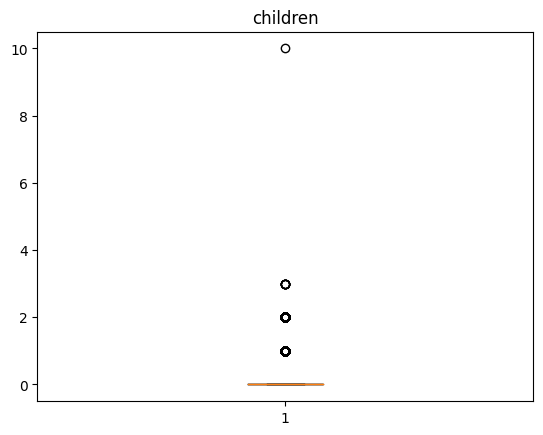

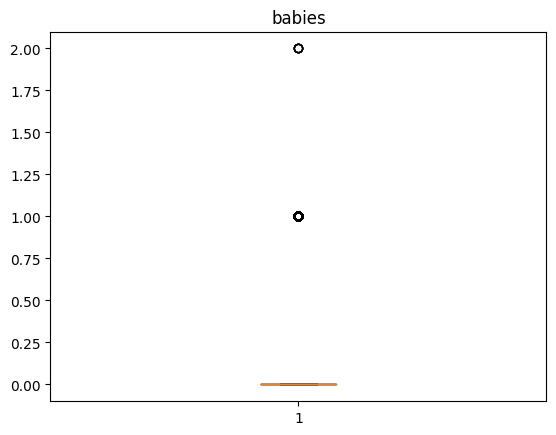

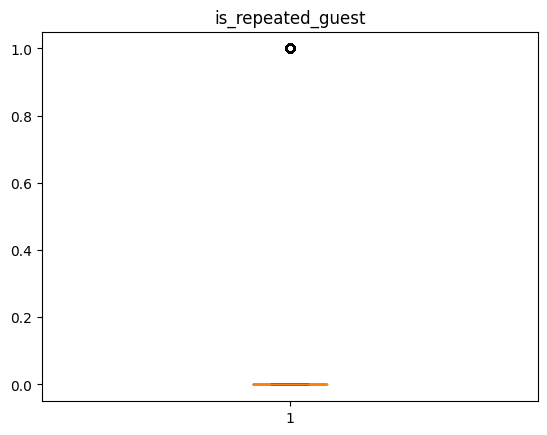

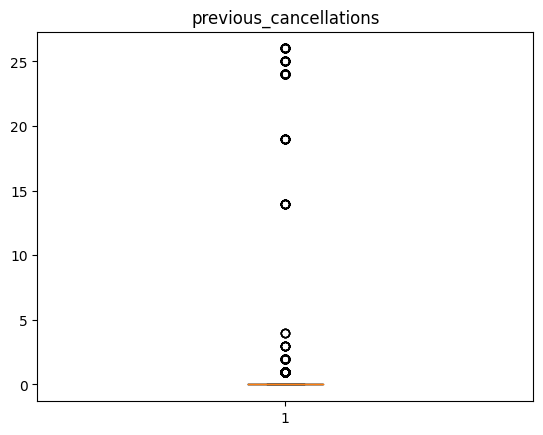

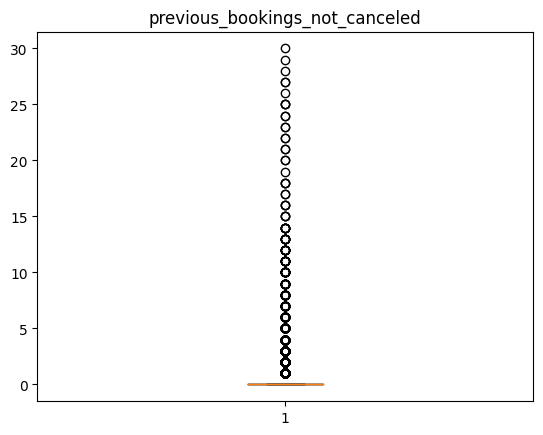

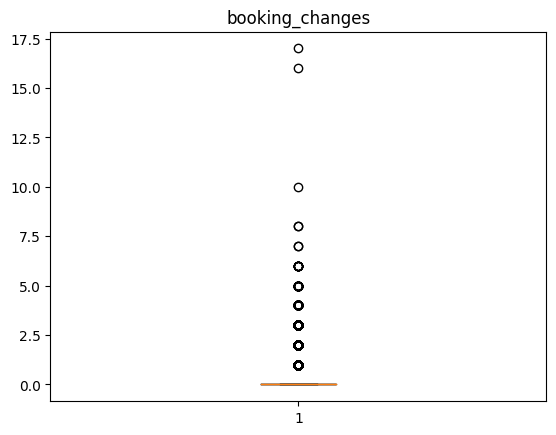

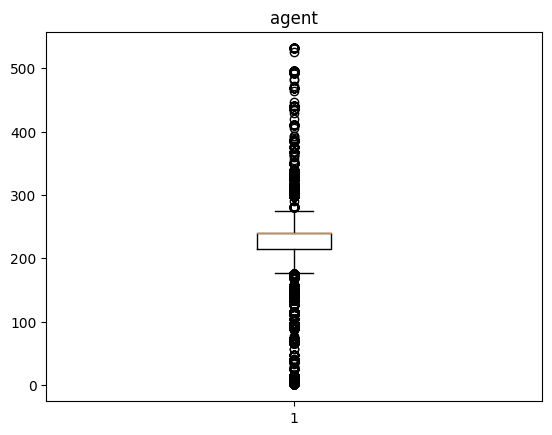

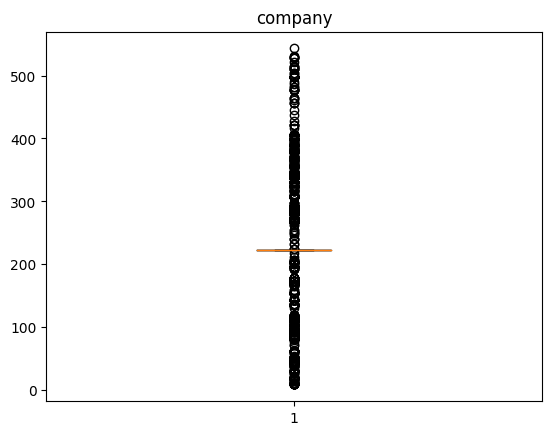

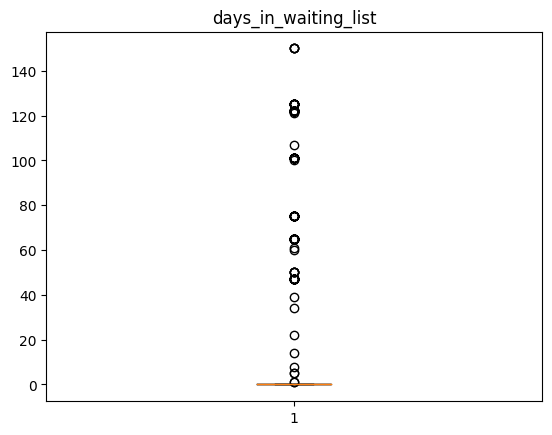

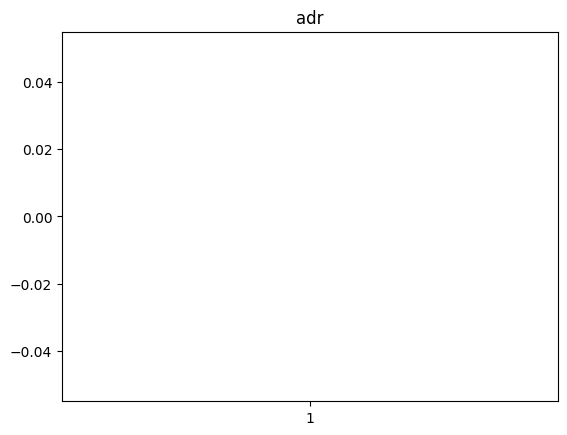

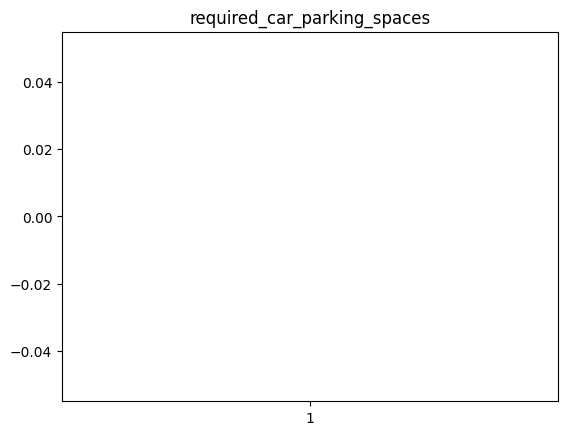

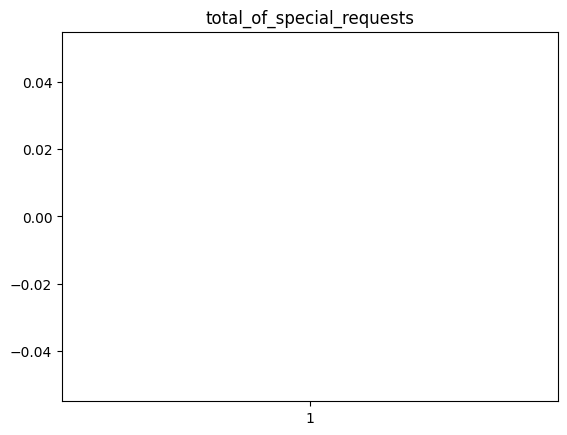

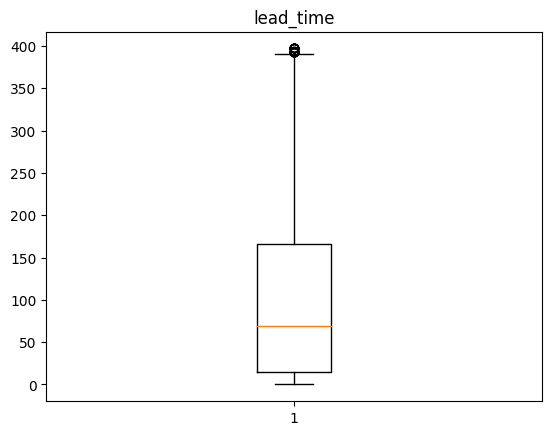

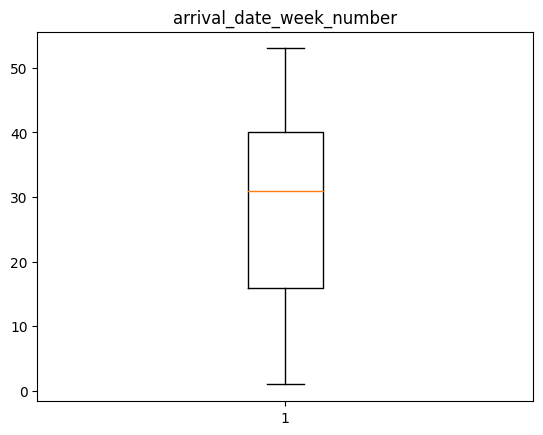

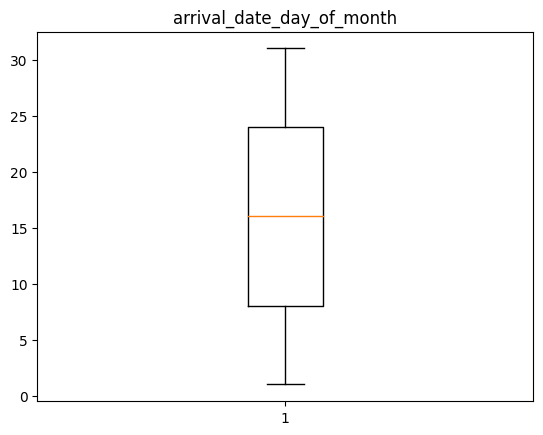

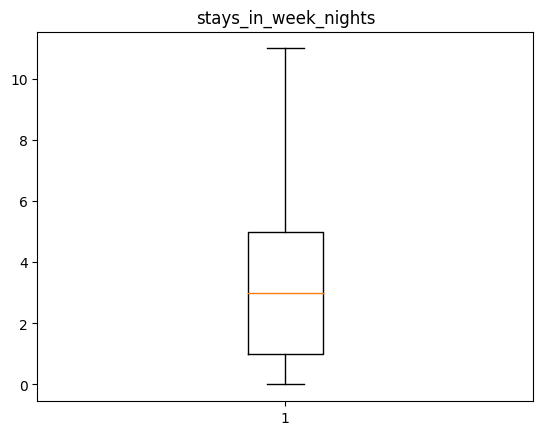

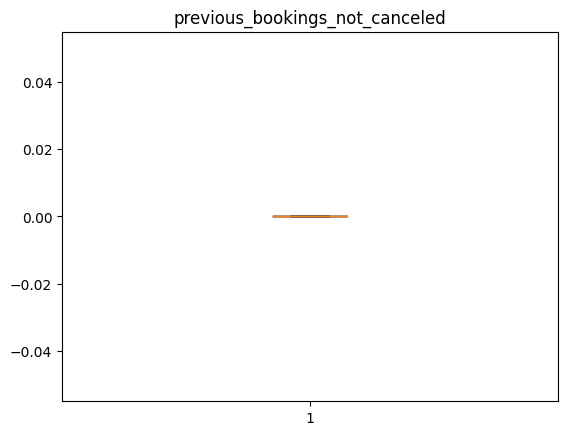

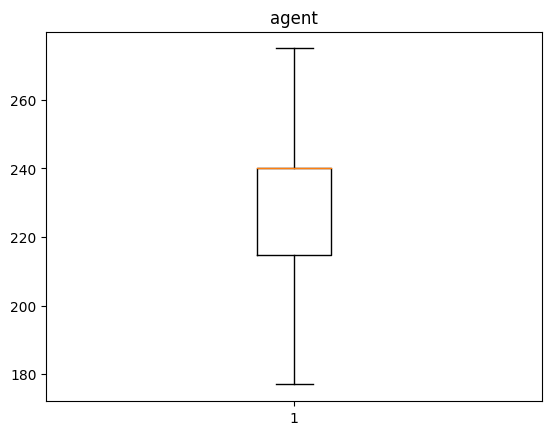

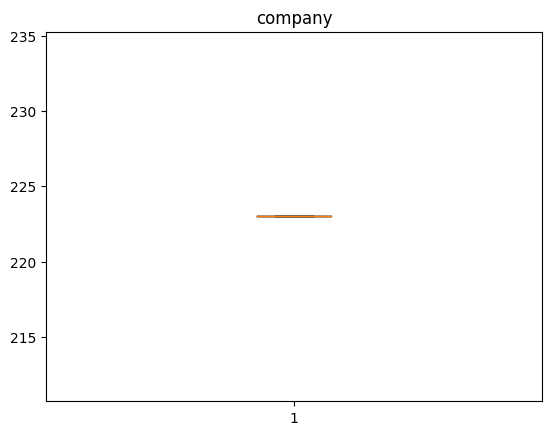

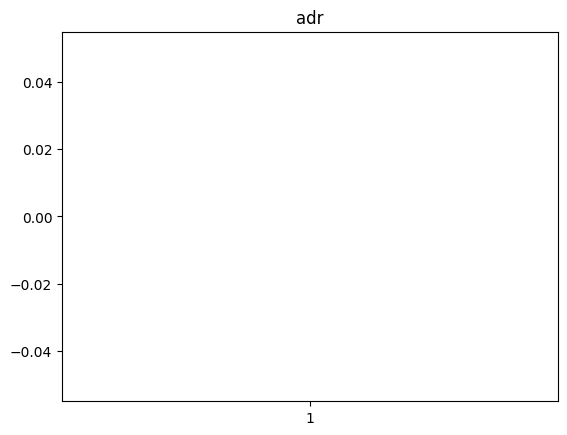

In [5]:
for i in numerical_feature:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
for j in numerical_feature:
    if j not in descrete_features:
        Q11= np.percentile(df[j],25)
        Q13= np.percentile(df[j],75)
        IQR3 = Q13-Q11
        lwr_bound3=Q11-(1.5*IQR3)
        upr_bound3=Q13+(1.5*IQR3)
        df.drop(df[df[j]>upr_bound3].index,inplace=True)
        df.drop(df[df[j]<lwr_bound3].index,inplace=True)
        plt.boxplot(df[j])
        plt.title(j)
        plt.show()

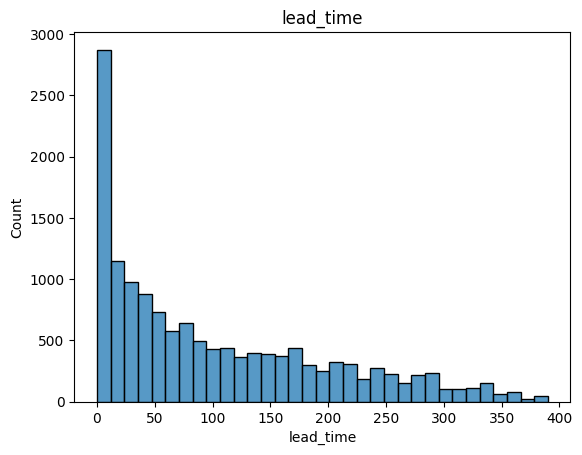

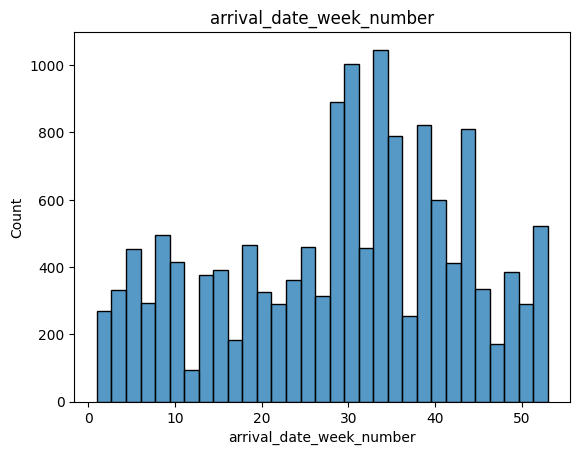

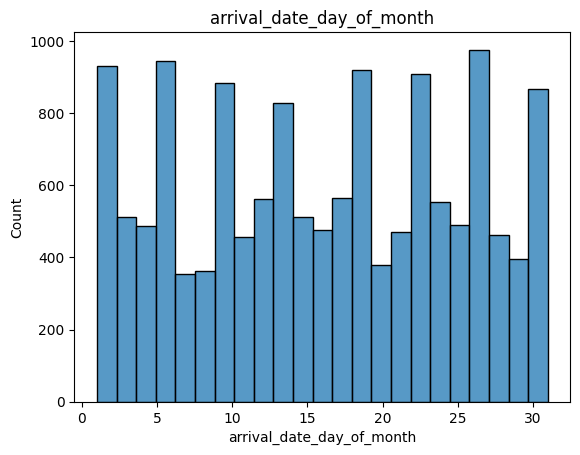

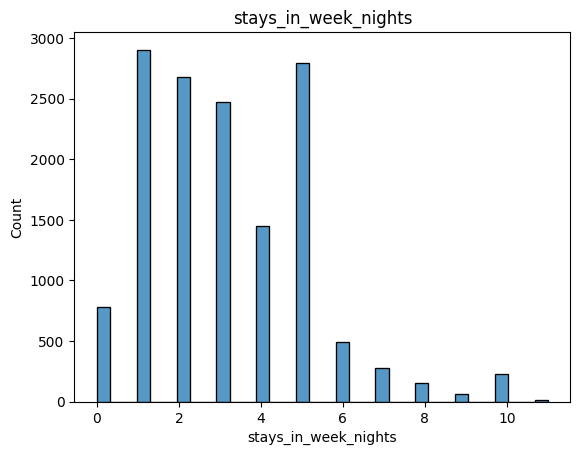

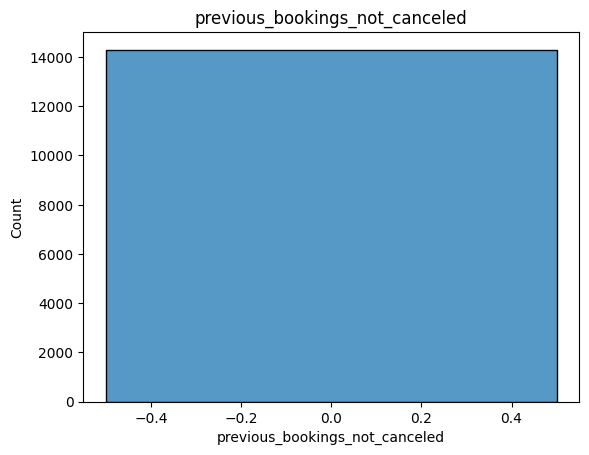

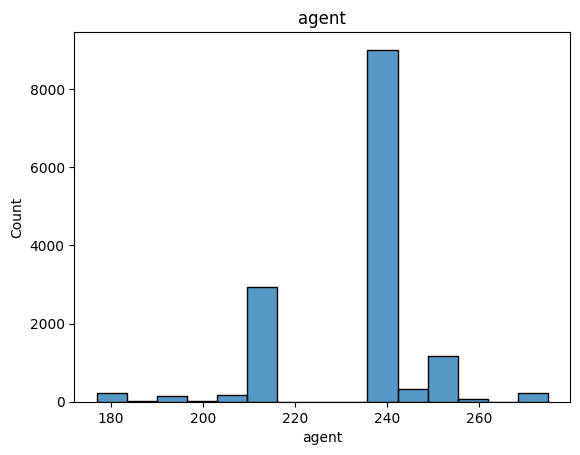

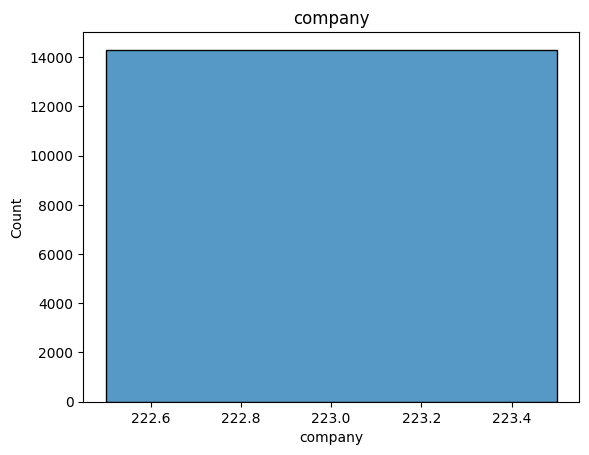

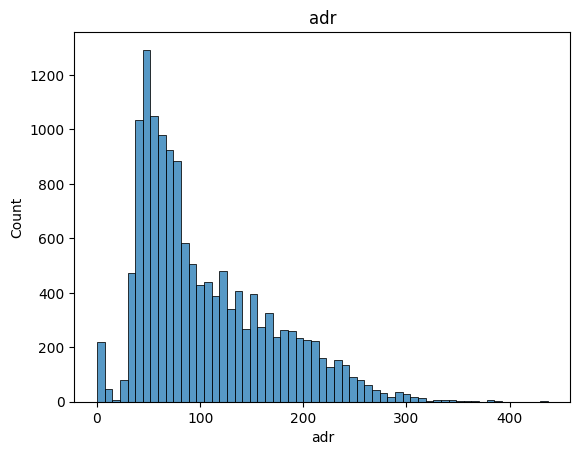

In [6]:
for i in numerical_feature:
    c=df.copy()
    if i not in descrete_features:
        sns.histplot(df[i])
        plt.title(i)
        plt.show()
    else:
        pass


In [7]:
for i in categorical_feature:
    unique_values_count = df[i].nunique()
    print(f"Unique values count in '{i}': {unique_values_count}")
for j in categorical_feature:
    unique_values_count = df[j].nunique()


    if unique_values_count >= 6:
        label = LabelEncoder()
        df[j] = label.fit_transform(df[j])
    else:
        df=pd.get_dummies(df,columns=[j],drop_first=True);
print(df.columns.nunique())


Unique values count in 'assigned_room_type': 9
Unique values count in 'meal': 5
Unique values count in 'distribution_channel': 4
Unique values count in 'arrival_date_month': 12
Unique values count in 'reserved_room_type': 9
Unique values count in 'country': 94
Unique values count in 'reservation_status': 3
Unique values count in 'market_segment': 6
Unique values count in 'deposit_type': 3
Unique values count in 'reservation_status_date': 892
Unique values count in 'customer_type': 5
Unique values count in 'hotel': 1
41


is_canceled                        -0.283391
lead_time                          -0.204240
arrival_date_year                   0.288078
arrival_date_month                  0.127134
arrival_date_week_number           -0.307163
arrival_date_day_of_month          -0.033242
stays_in_weekend_nights             0.531412
stays_in_week_nights                0.835841
adults                             38.587592
children                            2.787566
babies                              8.624922
country                            -0.544056
market_segment                     -0.987015
is_repeated_guest                  12.082869
previous_cancellations             11.674438
previous_bookings_not_canceled      0.000000
reserved_room_type                  0.699316
assigned_room_type                  0.386488
booking_changes                     4.647481
agent                              -0.291598
company                             0.000000
days_in_waiting_list               15.843758
adr       

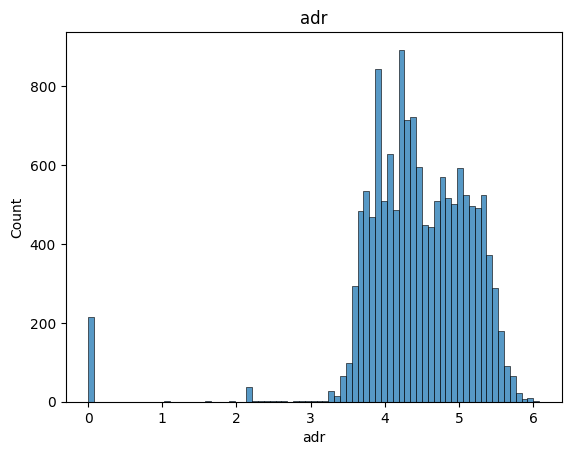

In [11]:
print(df.skew())
for j in numerical_feature:
    unique_values = df[j].nunique()

    if unique_values >= 20:
        if df[j].skew()<=(-0.5) :
            df[j]=np.square(df[j])
            print("skewed value ",df[j].skew())
            print(df[j])
            sns.histplot(df[j])
            plt.title(j)
            plt.show()
        elif df[j].skew()>0.5:

            df[j] = np.log1p(df[j])
            print("skewed value",df[j].skew())
            print(df[j].nunique())
            sns.histplot(df[j])
            plt.title(j)
            plt.show()

    else :
        pass;


In [12]:
x=df.drop(["is_canceled"],axis=1)
y=df["is_canceled"]

print(x)
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train)
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test= sc.transform(x_test)
print(x_train)



       lead_time  arrival_date_year  arrival_date_month  \
0      16.711327               2015                   5   
2       2.932775               2015                   5   
4       4.266982               2015                   5   
5       4.266982               2015                   5   
6       0.000000               2015                   5   
...          ...                ...                 ...   
21941   5.218690               2016                   7   
21943   0.000000               2016                   7   
21944   2.681682               2016                   7   
21947   0.774284               2016                   7   
21949   0.774284               2016                   7   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            27                          1   
2                            27                          1   
4                            27                          1   
5                            27            